# Expected number of solutions at distance $N\delta$ from a random source

Computes the exponential growth rate $\Psi(\delta)$ of the average of the number $\mathcal{N}(N\delta)$ of solutions that are at distance $N\delta$ from a random vector $x_*$ with i.i.d entries drawn from a Bernoulli law with parameter $p\in[0,1]$ :

$\Psi(\delta)=\lim_{N\to\infty}(1/N)\log \mathbb{E}[\mathcal{N}(N\delta)]$, where the average is over the graph ensemble and the source $x_*$. 

$\Psi(\delta)$ is an annealed average, and $\mathbb{E}[\mathcal{N}(N\delta)]$ gives an upper bound on the probability of having a solution at distance $N\delta$ from a random source.

This is for a particular degree profile: for the check nodes one takes $P(x)=\sum_{k=0}^{\infty}P_kx^k$, and for the variables nodes one takes $\Lambda(x)=\Lambda_1 x+\Lambda_2 x^2$. In the limit $N\to\infty$ the fractions $\Lambda_1, \Lambda_2$ are taken constants.

In [1]:
include("header.jl")

zeroPsi (generic function with 3 methods)

Set the degree profile $P(x)$ with an array of tuples $[(k_{min},P_{k_{min}}),\dots,(k_{max},P_{k_{max}})]$, and the Bernoulli parameter $p$. The positive real number $y_0$ is an initial condition for the iterative resolution of a fixed-point equation (see equations (11.18), (11.19) in the book of Marc Mézard and Andrea Montatari).


In [2]:
P = [(8,1)] # degree profile for the check nodes
p = 0.5 # Bernoulli parameter
y0 = 0.5 # initial condition for the iterative resolution

0.5

Then plot the function $\Psi$=Psi as a function of $\delta\in[0,1]$ for several values of $\Lambda_1\in[0,1]$, ($\Lambda_2=1-\Lambda_1$)

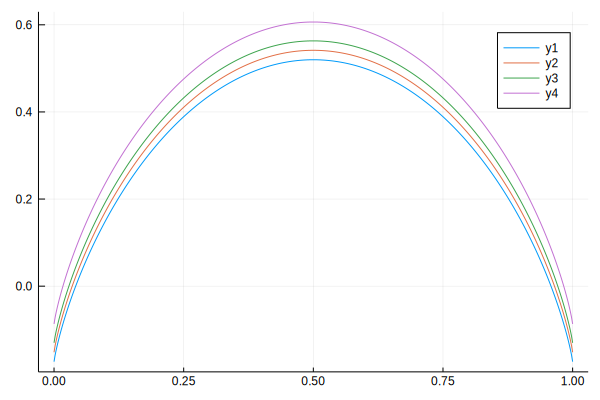

In [3]:
D = range(0., 1., length=500) #range of delta
tPs(d, p, lambda1)=Psi(d, p, lambda1, P, y0)

Ps = tPs.(D, p, 0.)
plot(D, Ps)
Ps2 = tPs.(D, p, 0.25)
plot!(D, Ps2)
Ps3 = tPs.(D, p, 0.5)
plot!(D, Ps3)
Ps4 = tPs.(D, p, 1.)
plot!(D, Ps4)

At $p=0$, the source vector is not random, $x_*=0$, and one recovers the growth rate of the weight enumerator function (WEF). In this case there is no gap at small distances, for any value of $\Lambda_1\in[0,1]$, as it was shown in the book of Mézard and Montanari.

In the case of check nodes with fixed degrees (i.e $P(x)=x^k$), it seems that as soon as $p$ takes a value different from $0$ or $1$, there is a gap at small hamming distances. Increasing the fraction $\Lambda_1$ of leaves has the effect of reducing this gap, as it was expected, although the gap remains non-zero for any values of $\Lambda_1$.

# Plot the position of the zero as a function of $\alpha$

We can plot $\delta_0$, the position of the zero of the function $\Psi$: $\Psi(\delta_0; \{p, \Lambda_1, P\})=0$ as a function of $\Lambda_1$, or equivalently as a function of the density of constraints $\alpha = \Lambda'(1)/P'(1)=(\Lambda_1+2\Lambda_2)/P'(1)=(2-\Lambda_1)/P'(1)$. (The zero is obtained by bisection between $\delta=0$ and $\delta=0.5$)

First as a function of $\Lambda_1\in[0, 1]$

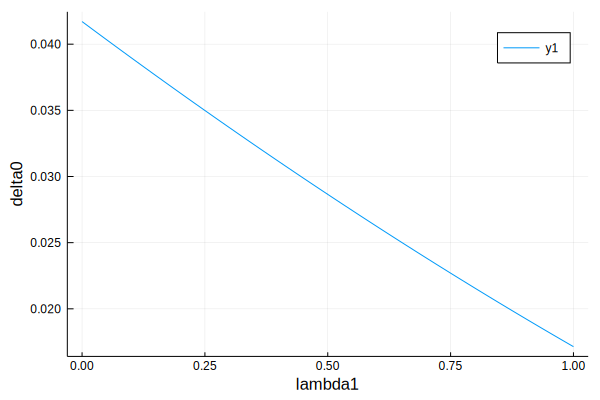

In [4]:
L1 = range(0., 1., length=500) # range of lambda1
tzP(l)=zeroPsi(p, l, P, y0)
ZP = tzP.(L1)
plot(L1, ZP, xlabel = "lambda1", ylabel = "delta0")

Now plot $\delta_0$ as a function of $\alpha\in[1/k, 2/k]$

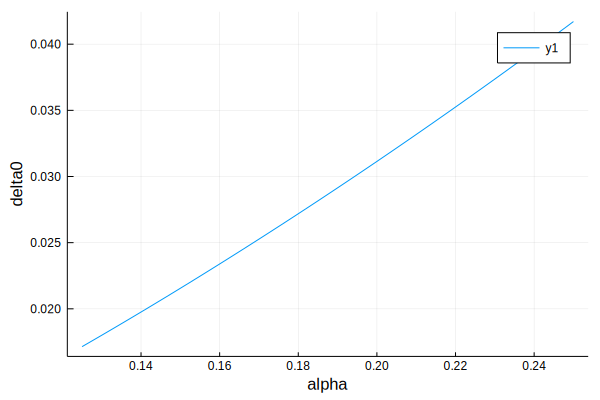

In [5]:
mP = 0
for i =1:length(P)
    k = P[i][1]
    Pk = P[i][2]
    mP += k*Pk
end #computes mP=P'(1)
AL = range(1/mP, 2/mP, length=500) #range of alpha
f(a)=2-a*mP
l1 = f.(AL)
zP = tzP.(l1)
plot(AL, zP, xlabel = "alpha", ylabel = "delta0")

## Rate-distortion plane

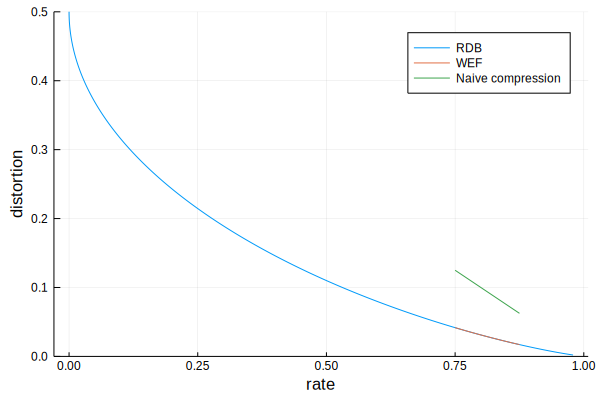

In [6]:
R = 1 .- AL
H(d) = -d*log2(d)-(1-d)*log2(1-d)

rdb_plot = plot(1 .- H.(D), D, ylim=(0,0.5), label="RDB")
plot!(rdb_plot, R, zP, xlabel = "rate", ylabel = "distortion", label="WEF")
plot!(rdb_plot, R, 0.5*(1 .-R), label="Naive compression")

Add datapoints from Max-Sum

In [7]:
using JLD    # save and load julia variables
include("../code/headers.jl")

# Load results from simulations run separately
sims = Vector{Simulation{MS}}(undef, 6)
for i in eachindex(sims)
    sims[i] = JLD.load("datapoints/gf2_$(i).jld", "sims")[1]
end

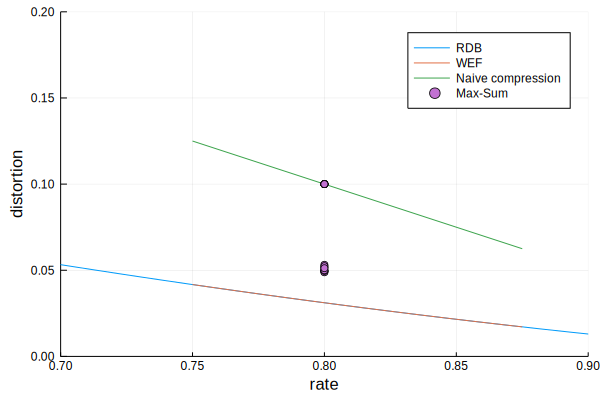

In [8]:
sim = sims[1]
dist = distortion(sim)
maxdist = maximum(dist)
amax = dist .== maxdist
# Compute naive compression distortion the correct way
dist[amax] .= naive_compression_distortion(0.8)
scatter!(deepcopy(rdb_plot), 0.8*ones(length(dist)), dist, label="Max-Sum")
ylims!((0,0.2))
xlims!((0.7,0.9))

In [9]:
convergence_ratio(sim)

0.55

## Some experiments with various settings (graph size, b, gamma...)

In [10]:
for i in eachindex(sims)
    print("### SIM $i ###")
    show(sims[i])
    show(sims[i].algo)
    println()
end

### SIM 1 ###
Simulation{MS} with q=2, n=2520, R=0.8, b=84, niter=20
MS
  maxiter: Int64 5000
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.001
  Tmax: Int64 5
  beta2: Float64 1.0
  sigma: Float64 0.0001

### SIM 2 ###
Simulation{MS} with q=2, n=2520, R=0.8, b=84, niter=20
MS
  maxiter: Int64 1000
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.0005
  Tmax: Int64 5
  beta2: Float64 1.0
  sigma: Float64 0.0001

### SIM 3 ###
Simulation{MS} with q=2, n=2940, R=0.8, b=98, niter=20
MS
  maxiter: Int64 500
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.0005
  Tmax: Int64 8
  beta2: Float64 1.0
  sigma: Float64 0.0001

### SIM 4 ###
Simulation{MS} with q=2, n=3360, R=0.8, b=67, niter=20
MS
  maxiter: Int64 300
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.0005
  Tmax: Int64 8
  beta2: Float64 1.0
  sigma: Float64 0.0001

###

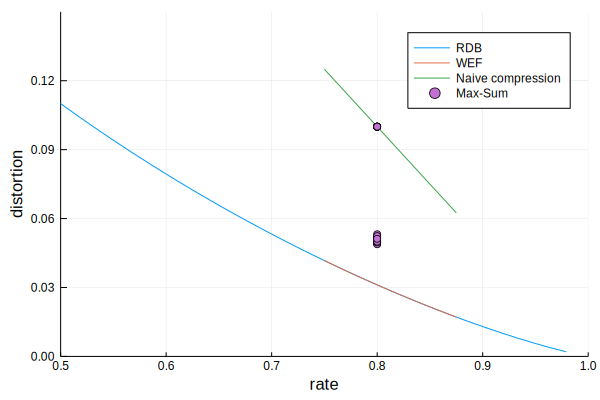

In [11]:
rdb_plot
ylims!((0,0.15))
xlims!((0.5,1))